In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_excel("D:/Internship/flight_fare/flight-fare-prediction/data/Data_Train.xlsx")
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df_test = pd.read_excel("D:/Internship/flight_fare/flight-fare-prediction/data/Test_set.xlsx")
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [5]:
df_train["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [6]:
df_train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [7]:
def summary_col(df, col):
    print(df[str(col)].value_counts())
    sns.set_style("whitegrid")
    plt.figure(figsize=(15,8))
    ax = sns.countplot(y=col, data=df)

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


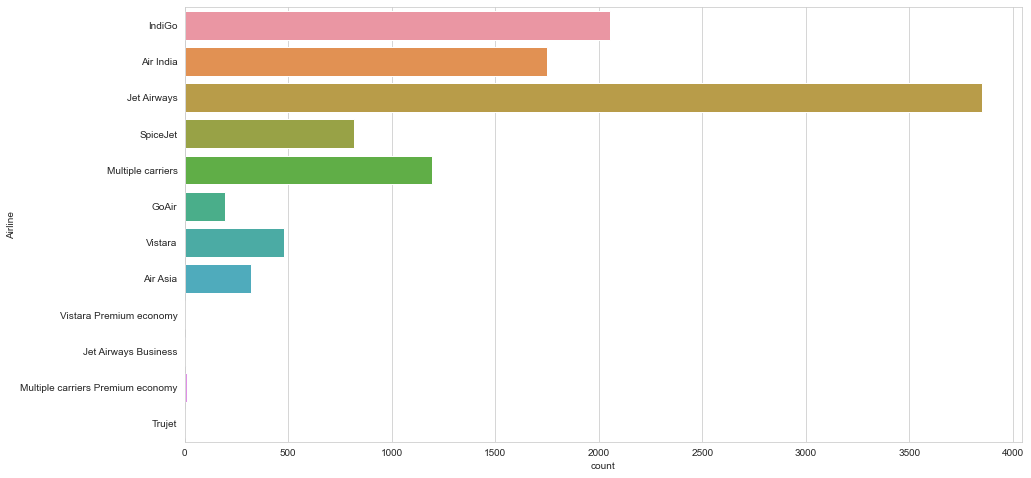

In [8]:
summary_col(df_train, "Airline")

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [11]:
df_train["Date_of_Journey"] = pd.to_datetime(df_train["Date_of_Journey"])
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [12]:
df_train.Date_of_Journey.min(), df_train.Date_of_Journey.max()

(Timestamp('2019-01-03 00:00:00'), Timestamp('2019-12-06 00:00:00'))

In [13]:
def year_month_extract(df, col):
    df[col + "_year"] = df[col].dt.year
    df[col + "_month"] = df[col].dt.month
    df[col + "_day"] = df[col].dt.day

    return year_month_extract

In [14]:
year_month_extract(df_train, "Date_of_Journey")

<function __main__.year_month_extract(df, col)>

In [15]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,2019,9,4
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,2019,4,27
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,2019,4,27
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,2019,1,3


In [16]:
df_train.isna().sum()/(len(df_train))*100

Airline                  0.000000
Date_of_Journey          0.000000
Source                   0.000000
Destination              0.000000
Route                    0.009361
Dep_Time                 0.000000
Arrival_Time             0.000000
Duration                 0.000000
Total_Stops              0.009361
Additional_Info          0.000000
Price                    0.000000
Date_of_Journey_year     0.000000
Date_of_Journey_month    0.000000
Date_of_Journey_day      0.000000
dtype: float64

In [17]:
df_train = df_train.dropna()
df_train = df_train.reset_index(drop = True)
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,2019,9,4
10678,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,2019,4,27
10679,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,2019,4,27
10680,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,2019,1,3


In [19]:
df_train["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [37]:
df_train.drop(["Date_of_Journey", "Route", "Additional_Info"], axis = 1, inplace=True)

KeyError: "['Date_of_Journey' 'Route'] not found in axis"

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


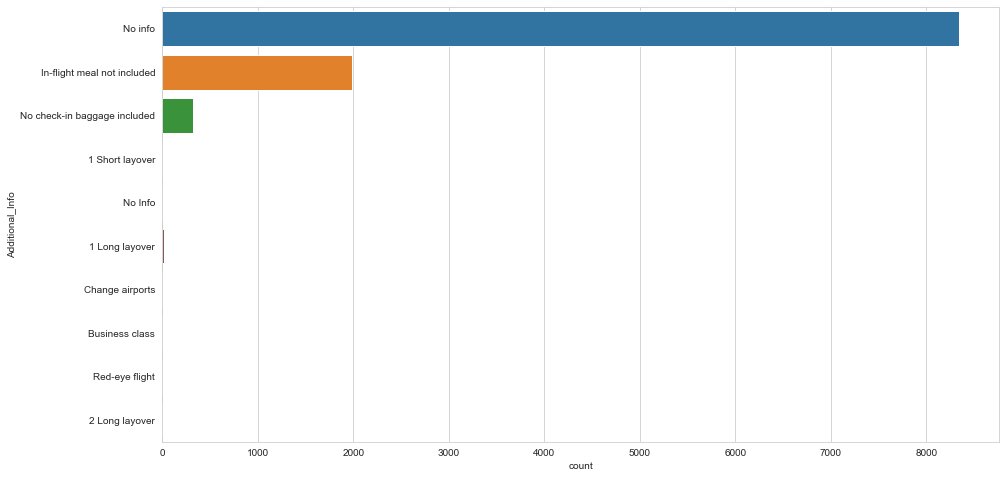

In [20]:
summary_col(df_train, "Additional_Info")

<AxesSubplot:xlabel='Price', ylabel='Count'>

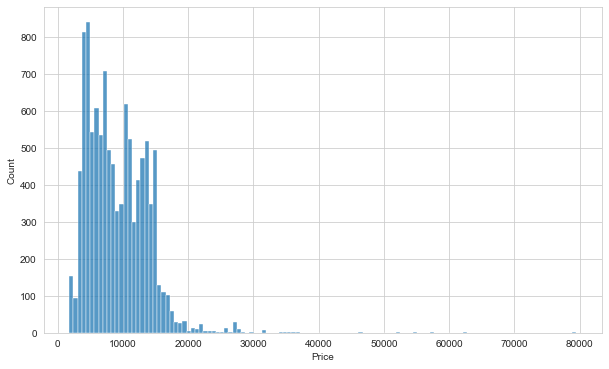

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(x = df_train["Price"])

In [22]:
def expensive(df):
    df = df[df["Price"] > 20000]
    return df 

In [23]:
expensive(df_train)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
7,Jet Airways,Banglore,New Delhi,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,2019,1,3
123,Air India,Delhi,Cochin,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430,2019,1,3
396,Multiple carriers,Delhi,Cochin,12:50,19:15,6h 25m,1 stop,No info,36983,2019,1,3
486,Jet Airways,Banglore,New Delhi,08:55,15:15,6h 20m,1 stop,No info,26890,2019,1,3
510,Jet Airways,Banglore,New Delhi,07:00,12:25,5h 25m,1 stop,No info,26890,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10438,Jet Airways,Banglore,New Delhi,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825,2019,1,3
10455,Jet Airways,Delhi,Cochin,19:10,18:50 08 Mar,47h 40m,2 stops,No info,20694,2019,6,3
10510,Air India,Banglore,New Delhi,06:45,09:25 02 Mar,26h 40m,2 stops,2 Long layover,26480,2019,1,3
10560,Jet Airways,Banglore,New Delhi,14:05,09:00 02 Mar,18h 55m,1 stop,No info,20800,2019,1,3


In [24]:
df_train.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3


In [25]:
def duration_minutes(df): 
    df["Duration"] = df["Duration"].str.replace("h", "*60").str.replace(' ','+').str.replace("m","*1").apply(eval)

    return df 

In [26]:
duration_minutes(df_train)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,170,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,445,2 stops,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,1140,2 stops,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,325,1 stop,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,285,1 stop,No info,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,19:55,22:25,150,non-stop,No info,4107,2019,9,4
10678,Air India,Kolkata,Banglore,20:45,23:20,155,non-stop,No info,4145,2019,4,27
10679,Jet Airways,Banglore,Delhi,08:20,11:20,180,non-stop,No info,7229,2019,4,27
10680,Vistara,Banglore,New Delhi,11:30,14:10,160,non-stop,No info,12648,2019,1,3


In [27]:
df_train

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,170,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,445,2 stops,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,1140,2 stops,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,325,1 stop,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,285,1 stop,No info,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,19:55,22:25,150,non-stop,No info,4107,2019,9,4
10678,Air India,Kolkata,Banglore,20:45,23:20,155,non-stop,No info,4145,2019,4,27
10679,Jet Airways,Banglore,Delhi,08:20,11:20,180,non-stop,No info,7229,2019,4,27
10680,Vistara,Banglore,New Delhi,11:30,14:10,160,non-stop,No info,12648,2019,1,3


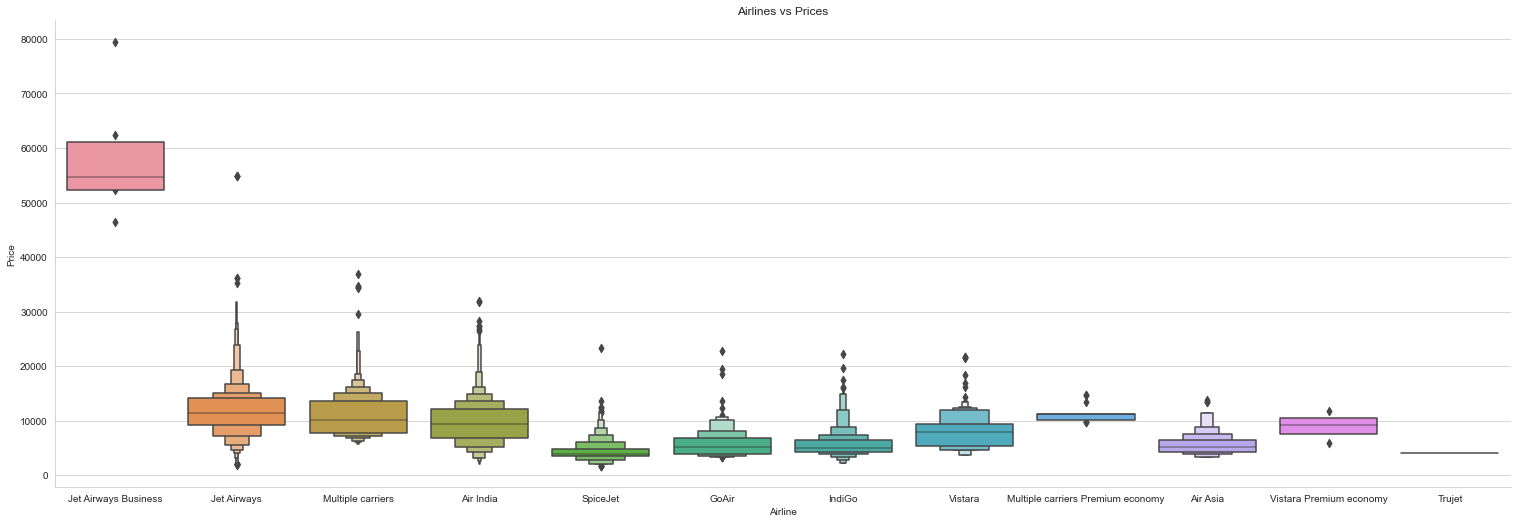

In [28]:
sns.catplot(y = "Price", x = "Airline", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 7, aspect = 3).set(title = "Airlines vs Prices")
plt.show()

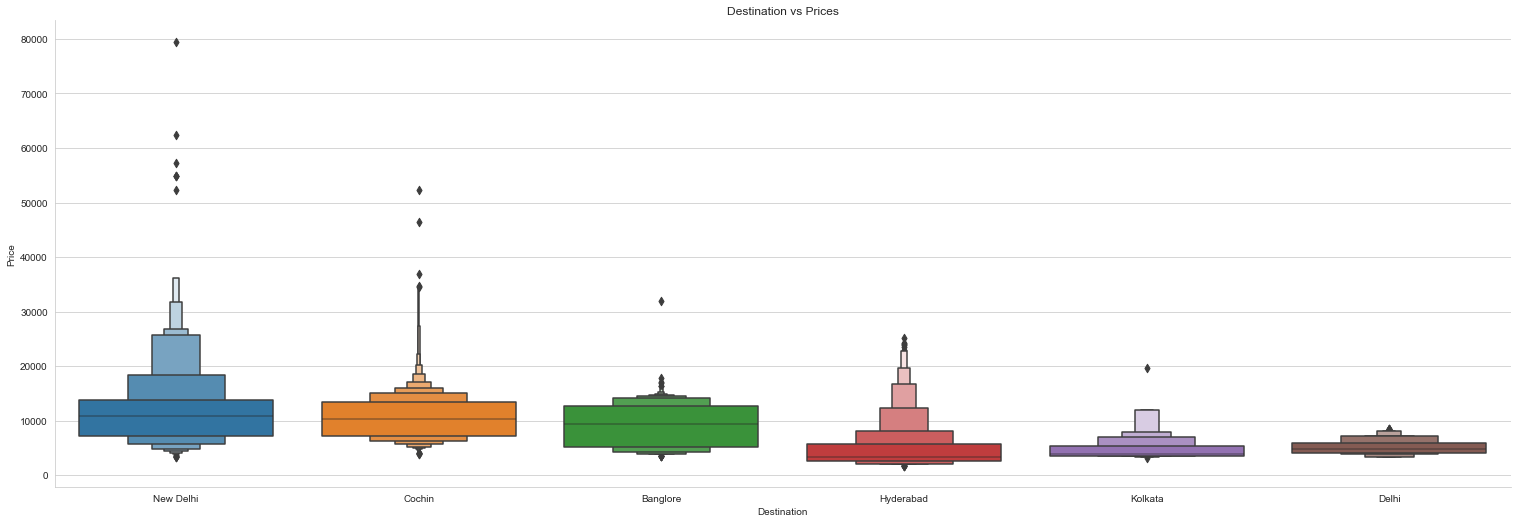

In [29]:
sns.catplot(y = "Price", x = "Destination", data = df_train.sort_values("Price", ascending = False), 
kind="boxen", height = 7, aspect = 3).set(title = "Destination vs Prices")
plt.show()

In [30]:
df_train["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

<AxesSubplot:xlabel='Duration', ylabel='Price'>

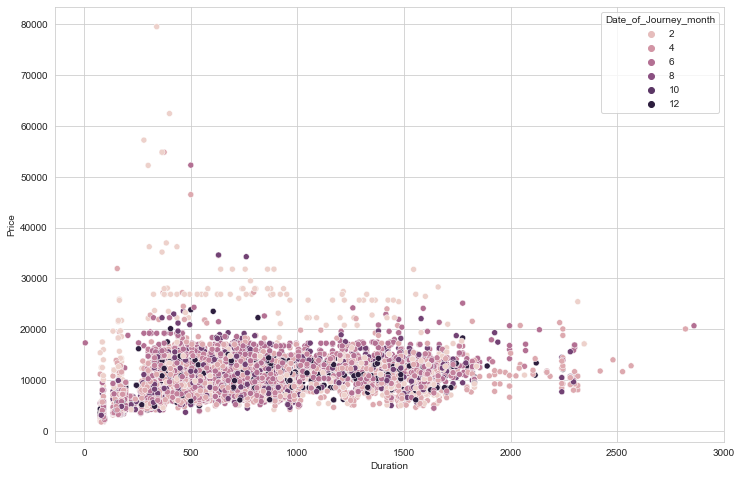

In [31]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_train["Duration"], y = df_train["Price"], hue = df_train["Date_of_Journey_month"])

In [32]:
df_train.corr()

,Duration,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
Duration,1.000000,0.506480,NaN,0.055136,-0.038360
Price,0.506480,1.000000,NaN,0.010705,-0.165448
Date_of_Journey_year,NaN,NaN,NaN,NaN,NaN
Date_of_Journey_month,0.055136,0.010705,NaN,1.000000,-0.264896
Date_of_Journey_day,-0.038360,-0.165448,NaN,-0.264896,1.000000


In [34]:
df_train.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,170,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,445,2 stops,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,1140,2 stops,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,325,1 stop,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,285,1 stop,No info,13302,2019,1,3


In [35]:
df_train["Dep_Time"] = pd.to_datetime(df_train["Dep_Time"])
df_train["Arrival_Time"] = pd.to_datetime(df_train["Arrival_Time"])
df_train

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
0,IndiGo,Banglore,New Delhi,2022-05-13 22:20:00,2022-03-22 01:10:00,170,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,2022-05-13 05:50:00,2022-05-13 13:15:00,445,2 stops,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,2022-05-13 09:25:00,2022-06-10 04:25:00,1140,2 stops,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,2022-05-13 18:05:00,2022-05-13 23:30:00,325,1 stop,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,2022-05-13 16:50:00,2022-05-13 21:35:00,285,1 stop,No info,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,2022-05-13 19:55:00,2022-05-13 22:25:00,150,non-stop,No info,4107,2019,9,4
10678,Air India,Kolkata,Banglore,2022-05-13 20:45:00,2022-05-13 23:20:00,155,non-stop,No info,4145,2019,4,27
10679,Jet Airways,Banglore,Delhi,2022-05-13 08:20:00,2022-05-13 11:20:00,180,non-stop,No info,7229,2019,4,27
10680,Vistara,Banglore,New Delhi,2022-05-13 11:30:00,2022-05-13 14:10:00,160,non-stop,No info,12648,2019,1,3


In [36]:
df_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df_train

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
0,IndiGo,Banglore,New Delhi,2022-05-13 22:20:00,2022-03-22 01:10:00,170,0,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,2022-05-13 05:50:00,2022-05-13 13:15:00,445,2,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,2022-05-13 09:25:00,2022-06-10 04:25:00,1140,2,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,2022-05-13 18:05:00,2022-05-13 23:30:00,325,1,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,2022-05-13 16:50:00,2022-05-13 21:35:00,285,1,No info,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,2022-05-13 19:55:00,2022-05-13 22:25:00,150,0,No info,4107,2019,9,4
10678,Air India,Kolkata,Banglore,2022-05-13 20:45:00,2022-05-13 23:20:00,155,0,No info,4145,2019,4,27
10679,Jet Airways,Banglore,Delhi,2022-05-13 08:20:00,2022-05-13 11:20:00,180,0,No info,7229,2019,4,27
10680,Vistara,Banglore,New Delhi,2022-05-13 11:30:00,2022-05-13 14:10:00,160,0,No info,12648,2019,1,3


In [38]:
def dep_arrival_extract(df, col):
    df[col + "_hour"] = df[col].dt.hour
    df[col + "_minute"] = df[col].dt.minute
    return dep_arrival_extract

In [39]:
dep_arrival_extract(df_train, "Dep_Time")
dep_arrival_extract(df_train, "Arrival_Time")

<function __main__.dep_arrival_extract(df, col)>

In [40]:
df_train

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,2022-05-13 22:20:00,2022-03-22 01:10:00,170,0,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,2022-05-13 05:50:00,2022-05-13 13:15:00,445,2,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2022-05-13 09:25:00,2022-06-10 04:25:00,1140,2,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,2022-05-13 18:05:00,2022-05-13 23:30:00,325,1,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,2022-05-13 16:50:00,2022-05-13 21:35:00,285,1,No info,13302,2019,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,2022-05-13 19:55:00,2022-05-13 22:25:00,150,0,No info,4107,2019,9,4,19,55,22,25
10678,Air India,Kolkata,Banglore,2022-05-13 20:45:00,2022-05-13 23:20:00,155,0,No info,4145,2019,4,27,20,45,23,20
10679,Jet Airways,Banglore,Delhi,2022-05-13 08:20:00,2022-05-13 11:20:00,180,0,No info,7229,2019,4,27,8,20,11,20
10680,Vistara,Banglore,New Delhi,2022-05-13 11:30:00,2022-05-13 14:10:00,160,0,No info,12648,2019,1,3,11,30,14,10


In [41]:
df_train.drop(["Dep_Time", "Arrival_Time"], axis = 1, inplace = True)

In [42]:
df_train

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,445,2,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,2019,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,150,0,No info,4107,2019,9,4,19,55,22,25
10678,Air India,Kolkata,Banglore,155,0,No info,4145,2019,4,27,20,45,23,20
10679,Jet Airways,Banglore,Delhi,180,0,No info,7229,2019,4,27,8,20,11,20
10680,Vistara,Banglore,New Delhi,160,0,No info,12648,2019,1,3,11,30,14,10
